In [54]:
import numpy as np
import pandas as pd

In [55]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")

In [56]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


In [57]:
# Dimensões do data frame
houses.shape

(1744, 13)

## Definindo se um imóvel está à venda ou para locação a partir do preço

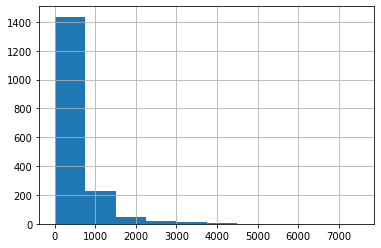

In [58]:
(houses['price']/1000).hist()

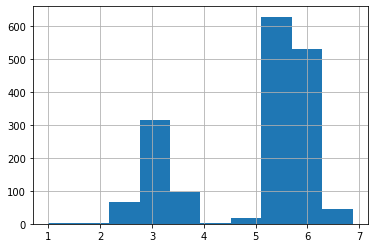

In [62]:
houses['log_price'] = houses['price'].apply(np.log10)
houses[houses['log_price'] > 0]['log_price'].hist()

In [63]:
# Adicionando coluna para aluguel e venda
houses['operation'] = 'sell'
houses.loc[(houses['price'] > 0) & (houses['price'] < 30000),'operation'] = 'rent'
houses = houses.drop(['log_price'], axis=1)
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell


In [ ]:
houses.dtypes

## Estatísticas univariadas

Exercícios:

1. Calcule a média (mean), mediana (median), moda (mode), variância (var), desvio padrão (std) para preço e área de imóveis à venda.
2. Calucle o IQR da área e preço (dica: describe)
3. Calcule o preço médio do metro quadrado de venda e aluguel para Recife
5. Calcule o preço médio do metro quadrado de venda para apartamentos e casas
6. Calcule a área média de venda para apartamentos e casas
7. Encontre os bairros com maior e menor valor de venda do metro quadrado
8. Calcule a média e mediana de venda do metro quadrado por bairros (dica: usar groupby)
9. Calcule a média do metro quadrado em apartamentos de no máximo 3 quartos no bairro Espinheiro
10. Encontre os bairros com a menor e maior mediana de área

In [64]:
houses[houses['operation'] == 'sell']['price'].mean()

652416.6103059581

In [65]:
houses[houses['operation'] == 'sell']['price'].median()

470000.0

In [66]:
houses[houses['operation'] == 'sell']['price'].mode()

0    350000
dtype: int64

In [67]:
houses[houses['operation'] == 'sell']['price'].var()

371353283907.4838

In [68]:
houses[houses['operation'] == 'sell']['price'].std()

609387.6302547369

In [69]:
houses[houses['operation'] == 'sell']['price'].describe()

count    1.242000e+03
mean     6.524166e+05
std      6.093876e+05
min      0.000000e+00
25%      3.300000e+05
50%      4.700000e+05
75%      7.400000e+05
max      7.500000e+06
Name: price, dtype: float64

In [70]:
houses[houses['operation'] == 'sell']['area'].describe()

count    1220.000000
mean      128.066484
std       102.078742
min        25.000000
25%        72.000000
50%       100.000000
75%       149.000000
max      1682.000000
Name: area, dtype: float64

In [71]:
houses[houses['operation'] == 'sell']['area'].describe()[4]

72.0

In [72]:
#IQR da área
houses['area'].describe()[6] - houses['area'].describe()[4]

69.0

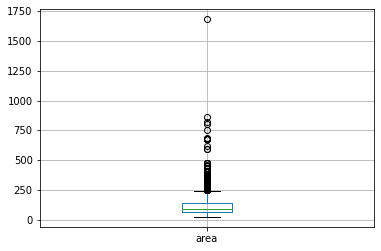

In [73]:
houses.boxplot(column=['area'])

In [ ]:
houses['price_square_meter'] = houses['price']/houses['area']

In [ ]:
houses[(houses.type == 'apart') & (houses.bedrooms <= 3) & (houses.suburb == 'Espinheiro') & (houses.operation == 'sell')].price_square_meter.mean()

In [ ]:
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean()

In [ ]:
houses[houses['operation']=='sell'].groupby(['suburb']).agg(['mean','median'])['price_square_meter']

In [ ]:
# Medianas do valor de venda por metro quadrado para cada bairro
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [ ]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')].describe()

In [ ]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')]

## Estatísticas bivariadas

In [ ]:
houses[houses.operation=='sell'].cov()

In [ ]:
houses.plot.scatter(x='longitude',y='latitude')

In [ ]:
houses[houses.operation=='sell'].corr(method='pearson')

In [ ]:
houses[houses.operation=='sell'].corr(method='spearman')

In [ ]:
houses.plot.scatter(x='area',y='price')

In [ ]:
houses.plot.scatter(x='bedrooms',y='area')